Используя базу "Пассажиры автобуса", подготовьте данные для обучения нейронной сети, классифицирующей изображение на два класса:

входящий пассажир
выходящий пассажир
Добейтесь точности работы модели на проверочной выборке не ниже 85%

Ссылка на датасет: https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip

In [ ]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [ ]:
# Скачиваем и распаковываем данные
!wget https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip
!unzip -q bus.zip -d bus

# Проверка
!ls bus

--2025-04-13 16:40:22--  https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78580527 (75M) [application/x-zip-compressed]
Saving to: ‘bus.zip.8’

bus.zip.8           100%[===================>]  74.94M  14.0MB/s    in 6.7s    

2025-04-13 16:40:30 (11.2 MB/s) - ‘bus.zip.8’ saved [78580527/78580527]

replace bus/Входящий/01009.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
Входящий  Выходящий


In [ ]:
# Разделяем данные на обучающую и временную выборки
x_train, x_temp, y_train, y_temp = train_test_split(
    x_all, y_all, test_size=0.3, random_state=42, stratify=y_all
)

# Разделяем временную выборку на валидационную и тестовую
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Параметры модели
drop_rate = 0.3
input_shape = 128 * 128

In [ ]:
# Создаем модель
model = Sequential()

# Первый скрытый слой
model.add(Dense(512, input_shape=(input_shape,)))  # Полносвязный слой с 512 нейронами
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(drop_rate))

# Второй скрытый слой
model.add(Dense(256))            # 256 нейронов
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(drop_rate))

# Третий скрытый слой
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(drop_rate))


model.add(Dense(1, activation="sigmoid"))

# Компилируем модель
model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.0005),
    metrics=["accuracy"],
)

In [ ]:
# Обучаем модель
history = model.fit(
    x_train,
    y_train,
    epochs=40,                  # Количество эпох обучения
    batch_size=32,              # Размер батча
    validation_data=(x_val, y_val),  # Данные для валидации
    verbose=1,                  # Вывод информации об обучении
)

Epoch 1/40
199/199 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.6590 - loss: 0.6595 - val_accuracy: 0.6527 - val_loss: 0.7198
Epoch 2/40
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8086 - loss: 0.4262 - val_accuracy: 0.7621 - val_loss: 0.5184
Epoch 3/40
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8352 - loss: 0.3819 - val_accuracy: 0.8473 - val_loss: 0.3579
Epoch 4/40
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8722 - loss: 0.3013 - val_accuracy: 0.8502 - val_loss: 0.3437
Epoch 5/40
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8761 - loss: 0.2893 - val_accuracy: 0.8532 - val_loss: 0.3037
Epoch 6/40
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8941 - loss: 0.2592 - val_accuracy: 0.8568 - val_loss: 0.3774
Epoch 7/40
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9044 - loss: 0.2333 - val_accuracy: 0.8671 - val_loss: 0.3299
Epoch 8/40
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9134 - loss: 0.2096 - val_accuracy: 0

In [ ]:
# Оцениваем модель на тестовых данных
_, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

# Выводим результаты
print(
    f"Точность на обучающей выборке: {history.history['accuracy'][-1] * 100:.2f}%,\n"
    "Точность на валидационной выборке: "
    f"{history.history['val_accuracy'][-1] * 100:.2f}%,\n"
    f"Точность на тестовой выборке: {test_accuracy * 100:.2f}%"
)

Точность на обучающей выборке: 97.42%,
Точность на валидационной выборке: 95.74%,
Точность на тестовой выборке: 95.08%


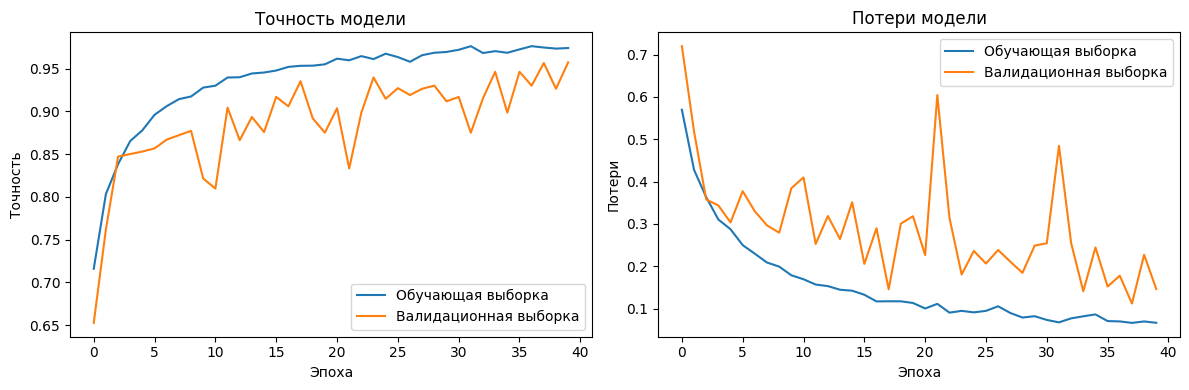

In [ ]:
# Создаем графики
plt.figure(figsize=(12, 4))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Обучающая выборка")
plt.plot(history.history["val_accuracy"], label="Валидационная выборка")
plt.title("Точность модели")
plt.xlabel("Эпоха")
plt.ylabel("Точность")
plt.legend()

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Обучающая выборка")
plt.plot(history.history["val_loss"], label="Валидационная выборка")
plt.title("Потери модели")
plt.xlabel("Эпоха")
plt.ylabel("Потери")
plt.legend()

plt.tight_layout()  # Автоматическая настройка расположения графиков
plt.show()